### ASTR 3300/5300$-$003: Astrostatistics
***N. Pol***
___

# Homework 2
### Due: Friday, Feb 7, at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

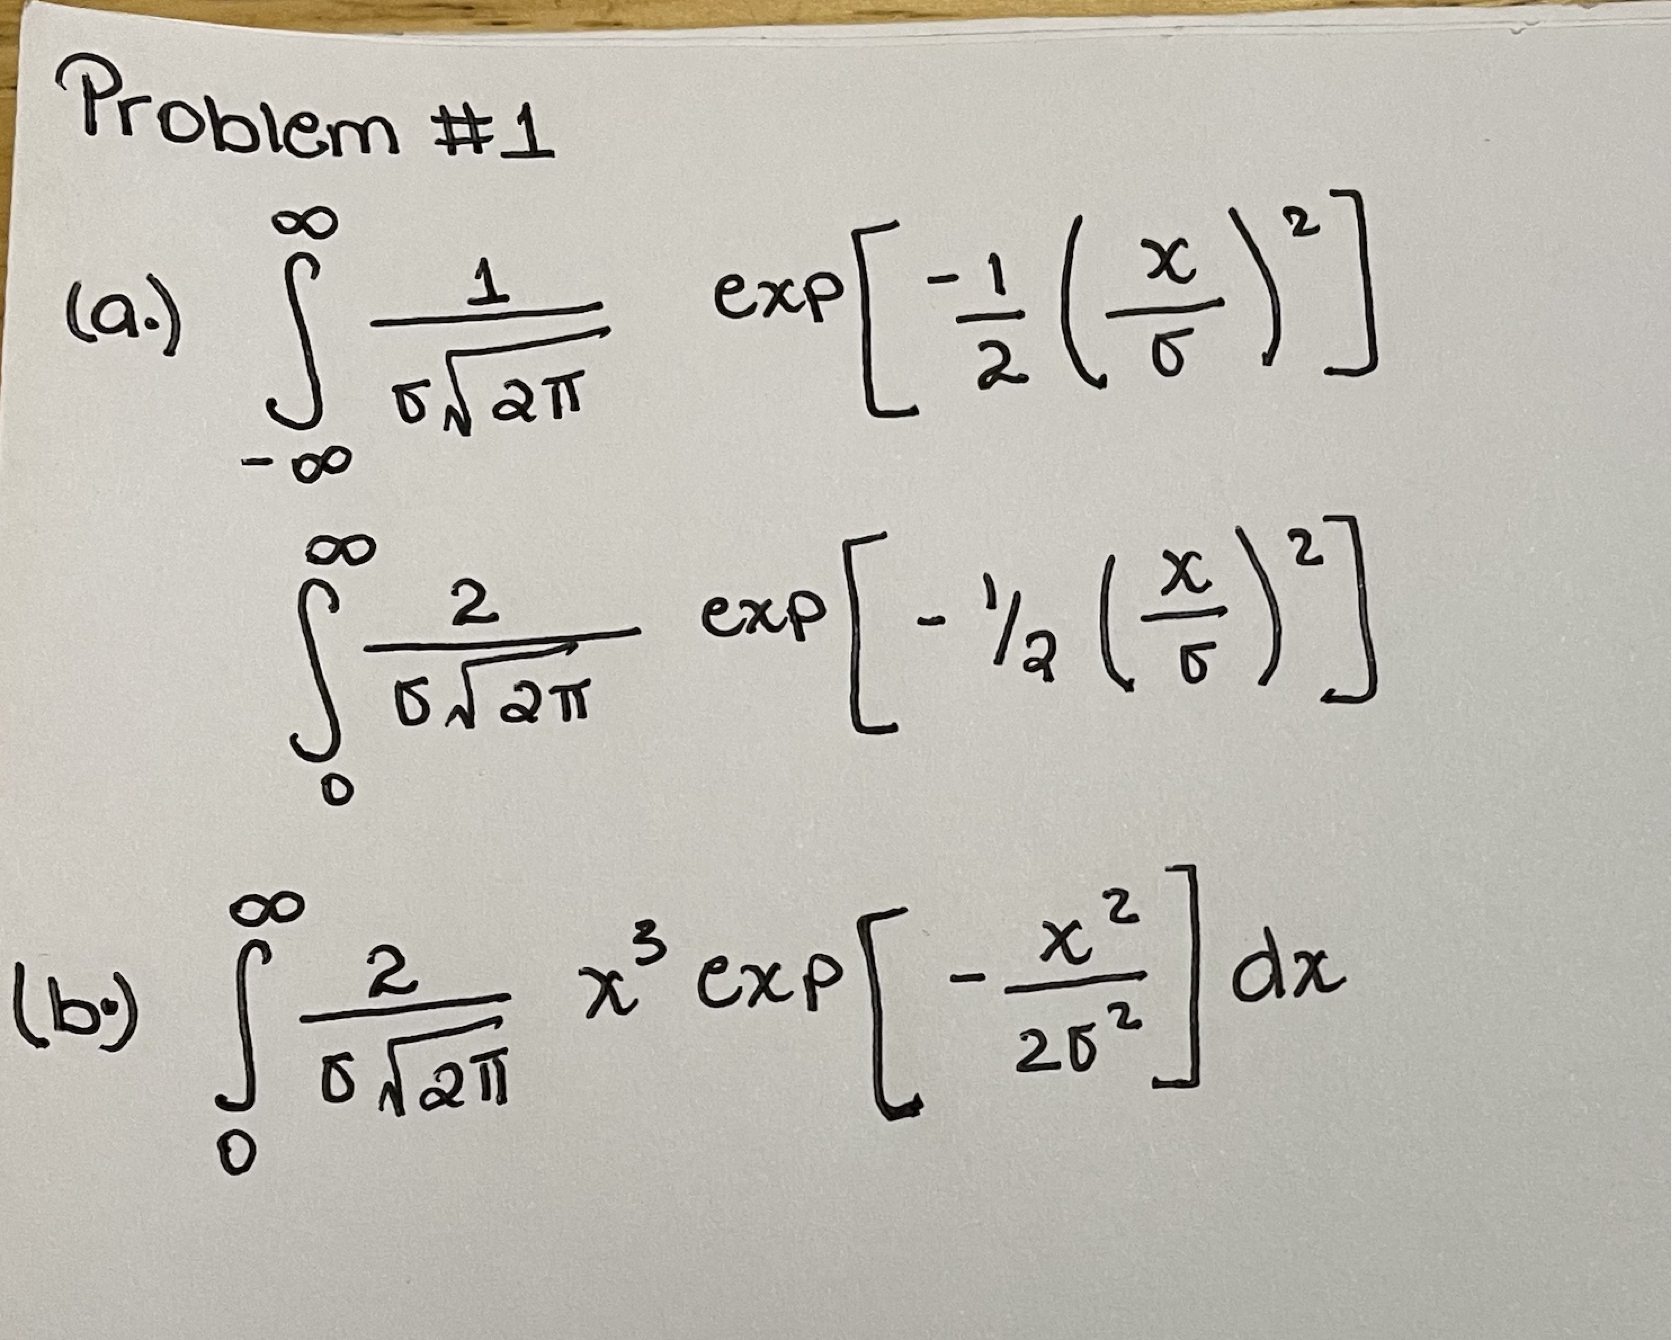

Monte Carlo estimate for N=100000: 34.45294326936609, True Value: 162


<>:54: SyntaxWarning: invalid escape sequence '\l'
<>:54: SyntaxWarning: invalid escape sequence '\l'
/var/folders/98/f0fty1gj2kl6n9j2plm2fzzm0000gn/T/ipykernel_89927/3130978621.py:54: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log_{10} N$')


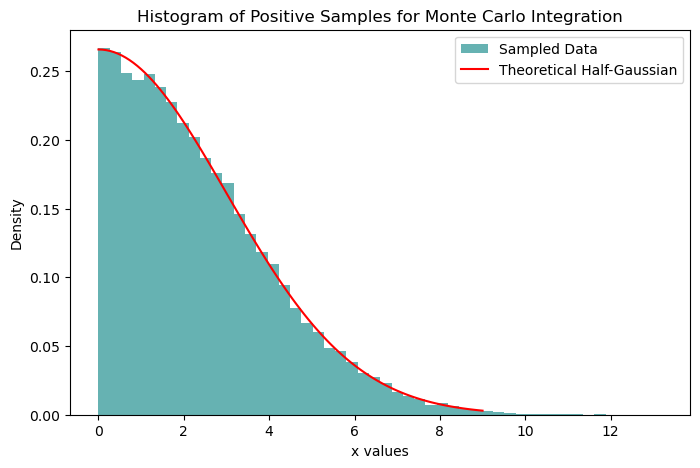

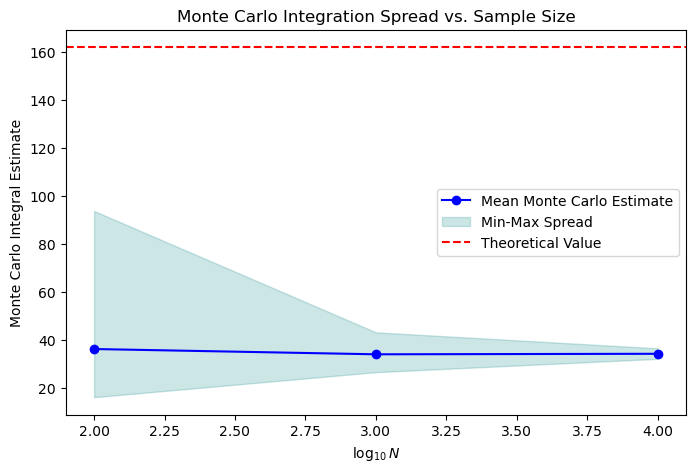

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfnorm

# Definition of Parameters given in problem 1
sigma = 3
true_value = 2 * sigma**4  #From the integral we can get the Theoretical Value

# Function for Monte Carlo integration
def monte_carlo_integration(N, sigma):
    samples = np.random.normal(0, sigma, N)  # Draw N samples from a normal distribution with mean 0 and standard deviation sigma
    positive_samples = samples[samples > 0]  # Keep only positive values which helps to simulate the half-Gaussian distribution
    integral_estimate = np.mean(positive_samples**3) * np.sqrt(2 / np.pi)  # Compute the integral estimate using the given formula
    return integral_estimate, positive_samples   #I used AI to help me with this section, formulated a similar example and then modified that code to complete problem

#Computation of integral for N = 10^5
N = int(1e5)
integral_estimate, positive_samples = monte_carlo_integration(N, sigma)
print(f"Monte Carlo estimate for N={N}: {integral_estimate}, True Value: {true_value}")

# Plot histogram of the positive samples used for integration (Part 3)
x_values = np.linspace(0, 3*sigma, 100)
theoretical_pdf = halfnorm(scale=sigma).pdf(x_values)  # Theoretical half-Gaussian PDF

plt.figure(figsize=(8, 5))
plt.hist(positive_samples, bins=50, density=True, alpha=0.6, color='Teal', label="Sampled Data")
plt.plot(x_values, theoretical_pdf, 'r-', label="Theoretical Half-Gaussian")  # Overlay theoretical half-Gaussian
plt.xlabel("x values")
plt.ylabel("Density")
plt.title("Histogram of Positive Samples for Monte Carlo Integration")
plt.legend()
plt.show()

#Repeat for different values of N for 10^2,10^3 and 10^4
N_values = [10**2, 10**3, 10**4]
batch_size = 100  # Number of batches for each N
results = {}

# This for loop-loops over different sample sizes to compute multiple estimates
for N in N_values:
    estimates = [monte_carlo_integration(N, sigma)[0] for _ in range(batch_size)]  # Compute 100 estimates for each N
    results[N] = estimates  # Store results in a dictionary

#Plot results for mean, maximum and minimum values
log_N = np.log10(N_values)  # Compute log base 10 of N values for plotting
means = [np.mean(results[N]) for N in N_values]  # Computation for mean of estimates for each N
mins = [np.min(results[N]) for N in N_values]  # Computation for minimum estimate for each N
maxs = [np.max(results[N]) for N in N_values]  # Computation for maximum estimate for each N

plt.figure(figsize=(8, 5))
plt.plot(log_N, means, marker='o', linestyle='-', label='Mean Monte Carlo Estimate', color='blue')
plt.fill_between(log_N, mins, maxs, color='teal', alpha=0.2, label='Min-Max Spread')  # Shades the area between min and max estimates
plt.axhline(true_value, color='red', linestyle='dashed', label='Theoretical Value')  # Plot the theoretical value as a reference point 
plt.xlabel('$\log_{10} N$')
plt.ylabel('Monte Carlo Integral Estimate')
plt.title('Monte Carlo Integration Spread vs. Sample Size')
plt.legend()
plt.show()


## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

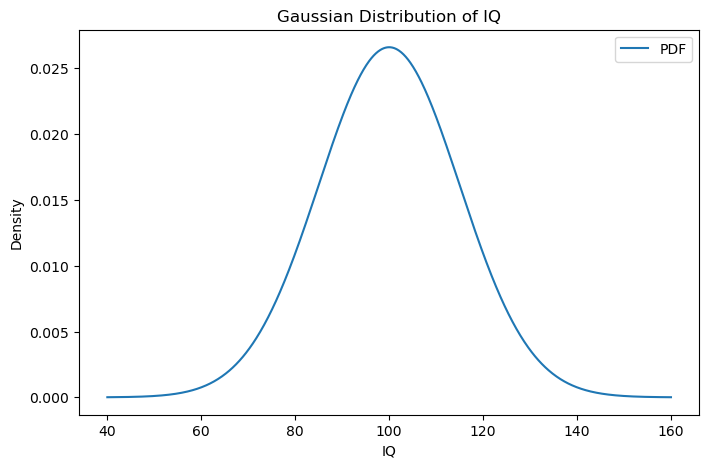

10 Random Draws: [ 96.47076942  87.85194524 112.15882086 102.83585164 124.08793594
 111.17032266 112.62378974  82.43173033  76.41975145 108.12863317]
PDF at x = 145: 0.0002954565607958672


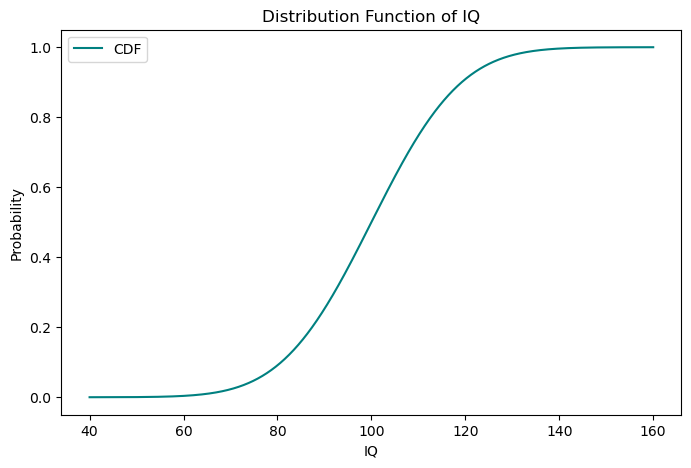

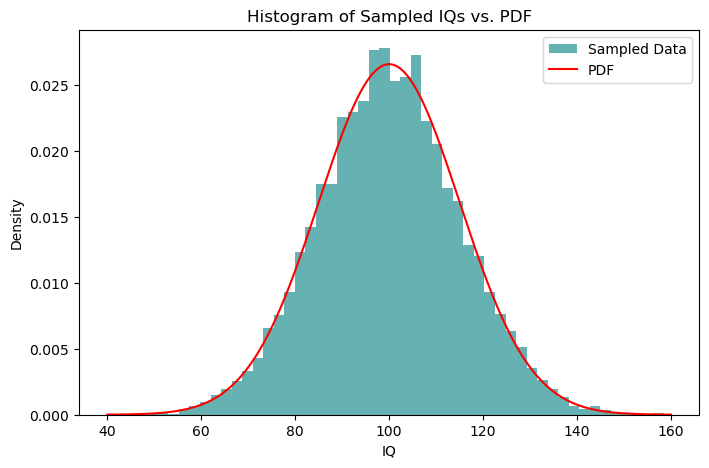

Fraction of people with IQ > 145: 0.0013498980316301035
IQ corresponding to one in a million: 171.3013646322563


In [51]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#parameters from problem 2 
mu, sigma = 100, 15  # Mean and standard deviation

#Create a Gaussian object and plot the distribution
rv = stats.norm(mu, sigma)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf_values = rv.pdf(x)

#ploting figure 1- Gaussian distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, label='PDF')
plt.xlabel('IQ')
plt.ylabel('Density')
plt.title('Gaussian Distribution of IQ')
plt.legend()
plt.show()

#Print 10 random draws
random_draws = rv.rvs(size=10)
print("10 Random Draws:", random_draws)

# Print PDF at x = 145
pdf_145 = rv.pdf(145)
print("PDF at x = 145:", pdf_145)

#Plot the  distribution function of IQ
cdf_values = rv.cdf(x)
plt.figure(figsize=(8, 5))
plt.plot(x, cdf_values, label='CDF', color='Teal')
plt.xlabel('IQ')
plt.ylabel('Probability')
plt.title('Distribution Function of IQ')
plt.legend()
plt.show()

# Inverse transform sampling using PPF for 10^4 samples
uni_samples = np.random.uniform(0, 1, 10000) #uni is short for unifrom sample 
iq_samples = rv.ppf(uni_samples)

# Plot histogram of samples
plt.figure(figsize=(8, 5))
plt.hist(iq_samples, bins=50, density=True, alpha=0.6, color='Teal', label='Sampled Data')
plt.plot(x, pdf_values, 'r-', label='PDF')
plt.xlabel('IQ')
plt.ylabel('Density')
plt.title('Histogram of Sampled IQs vs. PDF')
plt.legend()
plt.show()

#Fraction of people with IQ > 145
fraction_above_145 = 1 - rv.cdf(145)
print("Fraction of people with IQ > 145:", fraction_above_145)

#Finding the corresponding IQ for "one in a million"
threshold_iq = rv.ppf(1 - 1e-6)
print("IQ corresponding to one in a million:", threshold_iq)

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

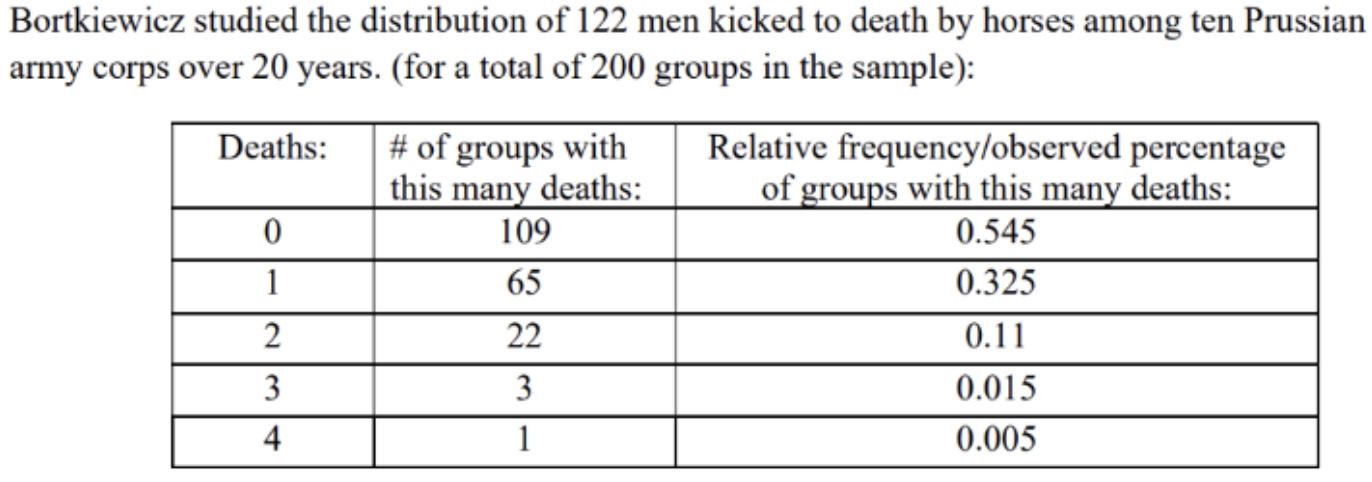

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

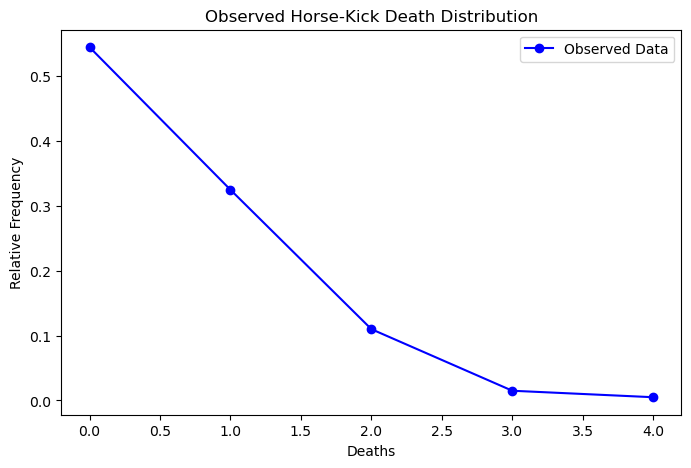

Estimated Poisson lambda (μ): 0.6100000000000001


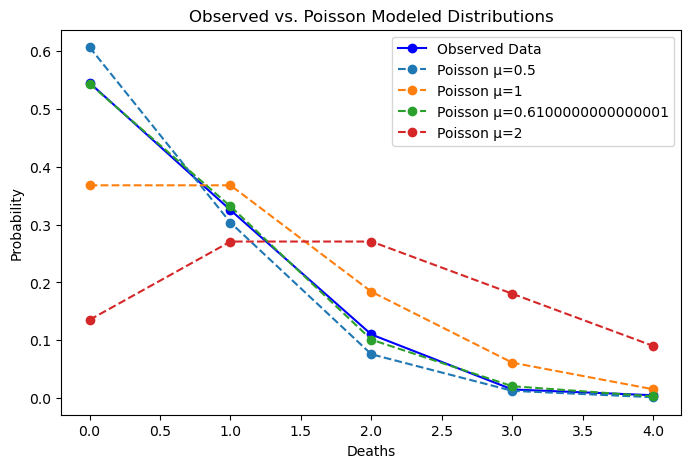

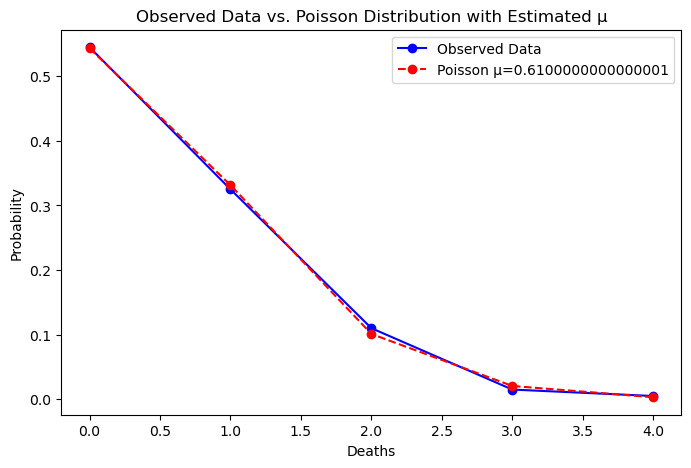

In [50]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#Definition of variables/values given in problem
deaths = np.array([0, 1, 2, 3, 4])
freq = np.array([109, 65, 22, 3, 1])
relative_freq = freq / np.sum(freq)

#Plot of columns 1 (death) vs 3 (Relative freqeuncy)
plt.figure(figsize=(8, 5))
plt.plot(deaths, relative_freq, marker='o', linestyle='-', label='Observed Data', color='blue')
plt.xlabel('Deaths')
plt.ylabel('Relative Frequency')
plt.title('Observed Horse-Kick Death Distribution')
plt.legend()
plt.show()

#Computation of weighted mean value as given in the hint 
mu_poisson = np.sum(deaths * relative_freq)
print("Estimated Poisson lambda (μ):", mu_poisson)

#Poisson distributions for different μ values as requested in part 2 of problem
x_poisson = np.arange(0, 5)
plt.figure(figsize=(8, 5))
plt.plot(deaths, relative_freq, marker='o', linestyle='-', label='Observed Data', color='blue')
for mu_guess in [0.5, 1, mu_poisson, 2]:
    poisson_pmf = stats.poisson.pmf(x_poisson, mu_guess)
    plt.plot(x_poisson, poisson_pmf, marker='o', linestyle='dashed', label=f'Poisson μ={mu_guess}')

plt.xlabel('Deaths')
plt.ylabel('Probability')
plt.title('Observed vs. Poisson Modeled Distributions')
plt.legend()
plt.show()

# Plot Poisson distribution with estimated μ alongside data
plt.figure(figsize=(8, 5))
plt.plot(deaths, relative_freq, marker='o', linestyle='-', label='Observed Data', color='blue')
poisson_pmf = stats.poisson.pmf(x_poisson, mu_poisson)
plt.plot(x_poisson, poisson_pmf, marker='o', linestyle='dashed', color='red', label=f'Poisson μ={mu_poisson}')

plt.xlabel('Deaths')
plt.ylabel('Probability')
plt.title('Observed Data vs. Poisson Distribution with Estimated μ')
plt.legend()
plt.show()